<a href="https://colab.research.google.com/github/garvit26/uber-data-analysis/blob/main/Uber_driving_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
data2 = pd.read_csv("rideshare_kaggle.csv")


In [ ]:
extra_cols = ['apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
              'apparentTemperatureHigh', 'dewPoint', 'precipIntensityMax', 'apparentTemperatureMax',
              'cloudCover', 'moonPhase', 'windGustTime', 'visibility', 'temperatureHighTime',
              'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLow',
              'apparentTemperatureLowTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
              'sunriseTime', 'sunsetTime', 'uvIndexTime', 'apparentTemperatureMinTime',
              'apparentTemperatureMaxTime', 'windBearing', 'uvIndex', 'visibility.1', 'ozone']

In [ ]:
data2 = data2.drop(extra_cols, axis=1)

In [ ]:
data2.head()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 693071 non-null  object 
 1   timestamp          693071 non-null  float64
 2   hour               693071 non-null  int64  
 3   day                693071 non-null  int64  
 4   month              693071 non-null  int64  
 5   datetime           693071 non-null  object 
 6   timezone           693071 non-null  object 
 7   source             693071 non-null  object 
 8   destination        693071 non-null  object 
 9   cab_type           693071 non-null  object 
 10  product_id         693071 non-null  object 
 11  name               693071 non-null  object 
 12  price              637976 non-null  float64
 13  distance           693071 non-null  float64
 14  surge_multiplier   693071 non-null  float64
 15  latitude           693071 non-null  float64
 16  lo

In [ ]:
data2['datetime']=pd.to_datetime(data2['datetime'])
data2.isnull().sum().sum()
data2.dropna(axis=0,inplace=True)
data2.isnull().sum().sum() #.sum() prints out all the null values in all columns while .sum().sum() wil print out the sum of the null values in all columns

0

# Analysis by time

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def plot_pretty(groupby_column):
    df1 =data2.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')


   month  counts
0     11  263771
1     12  374205


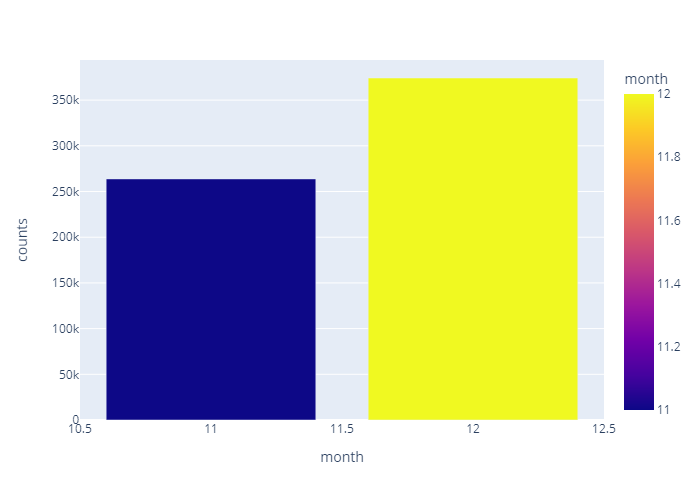

In [ ]:
plot_pretty('month')

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


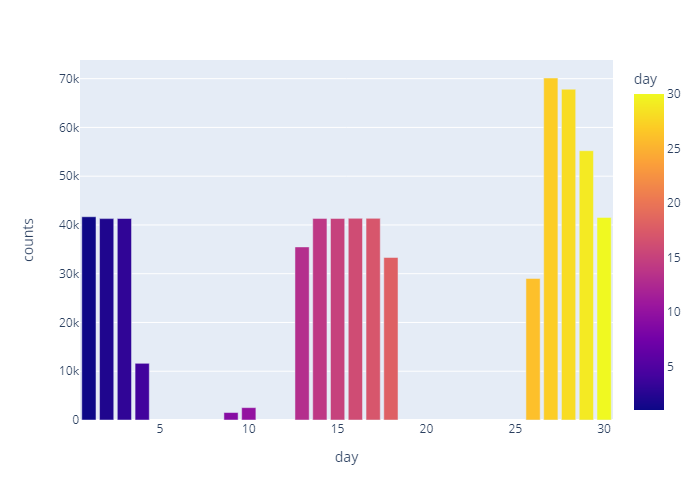

In [ ]:
plot_pretty('day')

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


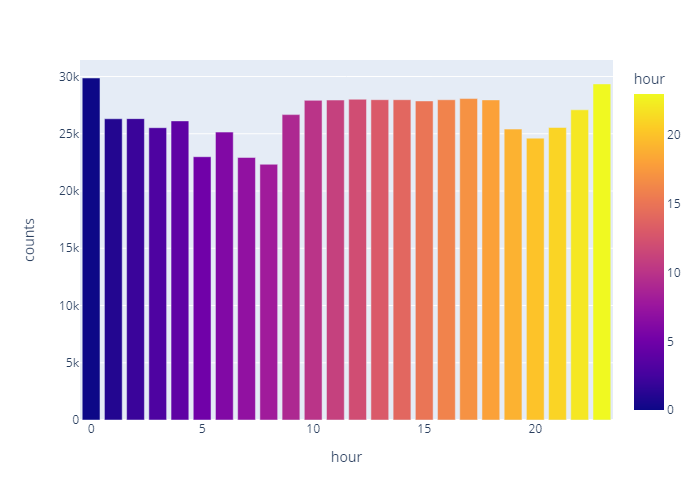

In [ ]:
plot_pretty('hour')


# Source and Destination Analysis

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


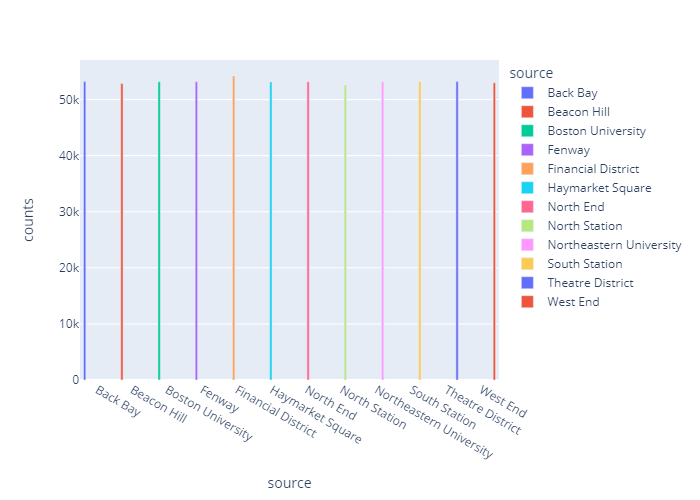

In [ ]:
plot_pretty('source')


                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


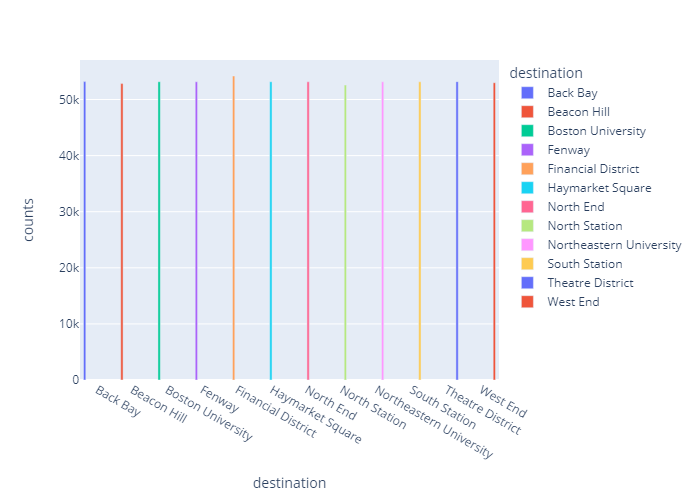

In [ ]:
plot_pretty('destination')


In [ ]:
data2.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})


latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

In [ ]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install folium

In [ ]:
import geopandas as gds
import folium
from folium.plugins import FastMarkerCluster
df1 = data2[data2['source']=='Boston University']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

# Type of cab taken


  cab_type  counts
0     Lyft  307408
1     Uber  330568


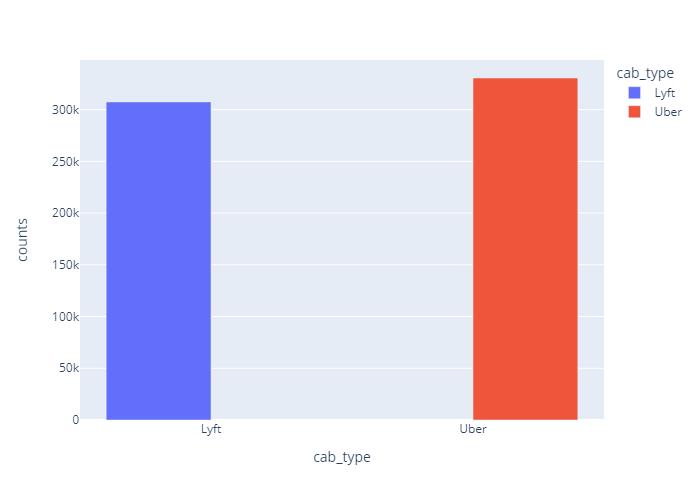

In [ ]:
plot_pretty('cab_type')

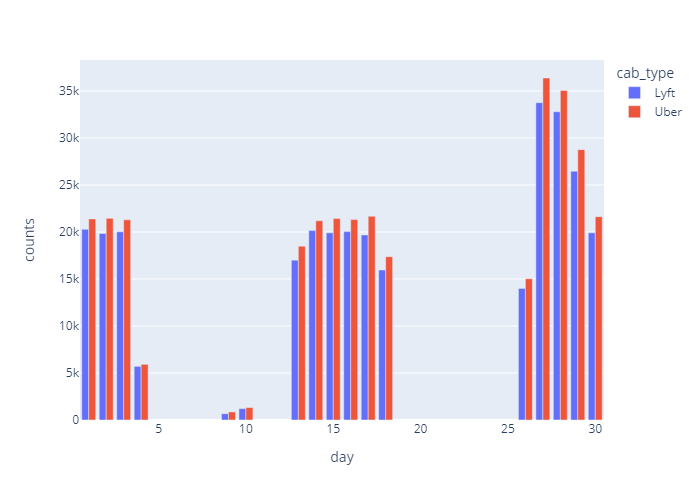

In [ ]:
df2 =data2.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

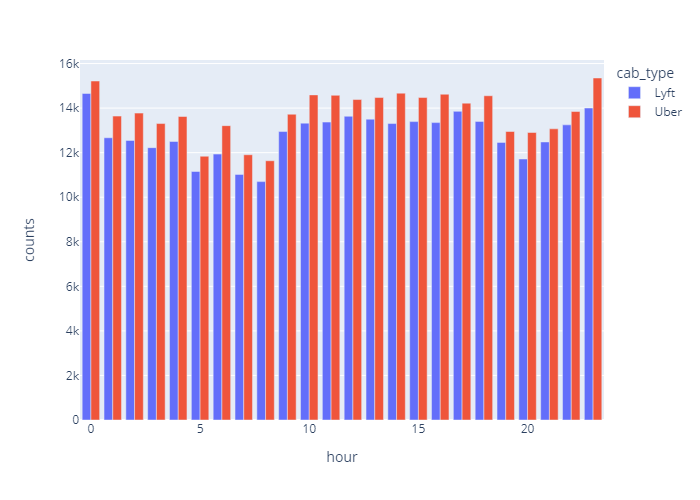

In [ ]:
df3 =data2.groupby(by=["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3.show(renderer='png')

In [ ]:
print('Maximum price in our data :',data2.price.max())
data2[data2['price']==data2.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,Clear,Light rain in the morning and overnight.,0.0,44.65,34.88,clear-night,1023.52,31.57,44.65


In [ ]:
pd.set_option('display.max_rows', 72)
data2.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [ ]:
data2[data2['price']==data2.price.max()][['source','destination']]


,source,destination
597071,Financial District,Fenway


In [ ]:
data2[data2['price']==data2.price.max()][['latitude','longitude']]


,latitude,longitude
597071,42.3503,-71.081


In [ ]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Apparently the 'Financial District - Fenway' route (by lyft) costs 97.5 dollars, which is our maximum price data. But from the map above, the distance between both places is not too far (they are both in boston), so it could be outlier since we don't have information about trip duration or transit. We should check another data with the same route


In [ ]:
data2_group = data2.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
data2_group[(data2_group['source']=='Financial District')& (data2_group['destination']=='Fenway')]

,source,destination,mean
25,Financial District,Fenway,23.40485


As the mean of the data is 23.4$, the max data found out seems to be an outlier. Therefore, we can drop it.

# Removing Outliers

In [ ]:
#We use the IQR method for finding out outliers.

Qp12 = data2['price'].quantile(0.25)
Qp32 = data2['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [ ]:
data2[data2['price']>(Qp32+(1.5*IQRp))]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
706,6c187b77-cfab-4fc2-87ae-ce6caf756e35,1.543402e+09,10,28,11,2018-11-28 10:41:07,America/New_York,South Station,Back Bay,Lyft,lyft_lux,Lux Black,52.5,3.25,2.00,42.3661,-71.0631,34.40,Partly Cloudy,Mostly cloudy throughout the day.,0.00,42.60,37.44,partly-cloudy-night,991.05,33.75,42.60
707,77644bac-cb00-4368-8aef-a3d0fd7861c2,1.544928e+09,2,16,12,2018-12-16 02:35:15,America/New_York,South Station,Back Bay,Lyft,lyft_luxsuv,Lux Black XL,67.5,3.25,2.00,42.3505,-71.1054,40.87,Partly Cloudy,Mostly cloudy throughout the day.,0.00,54.29,38.48,partly-cloudy-night,1024.46,39.74,54.29
769,8e4bd9d1-d823-4f20-8dca-42d22da91002,1.544808e+09,17,14,12,2018-12-14 17:20:04,America/New_York,Theatre District,Boston University,Lyft,lyft_luxsuv,Lux Black XL,45.5,4.76,1.00,42.3503,-71.0810,44.89,Partly Cloudy,Partly cloudy throughout the day.,0.00,46.68,40.90,partly-cloudy-day,1030.83,26.93,46.68
1094,3bebdd9d-17d7-47e0-9d92-2a08a56693d3,1.543770e+09,17,2,12,2018-12-02 17:03:02,America/New_York,Theatre District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,45.5,4.31,1.00,42.3503,-71.0810,46.78,Light Rain,Light rain until evening.,1.00,50.80,44.97,rain,1008.80,36.32,50.80
1318,91182a5d-dc85-4870-acb3-bc31604d15ab,1.544977e+09,16,16,12,2018-12-16 16:10:07,America/New_York,Financial District,Boston University,Lyft,lyft_luxsuv,Lux Black XL,45.5,5.33,1.00,42.3661,-71.0631,42.42,Overcast,Rain throughout the day.,0.29,43.78,34.12,cloudy,1018.69,38.94,43.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692439,ec85457f-b575-42a8-8ff7-8bdf2ee666a8,1.545078e+09,20,17,12,2018-12-17 20:20:04,America/New_York,Financial District,Boston University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,47.0,5.56,1.00,42.3588,-71.0707,40.40,Mostly Cloudy,Light rain in the morning.,0.00,41.35,24.00,partly-cloudy-day,999.80,34.25,41.35
692698,1d2bc447-5fcf-4fa0-a4fc-5838e07abeff,1.544782e+09,10,14,12,2018-12-14 10:00:11,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,52.5,4.58,1.25,42.3519,-71.0643,27.71,Partly Cloudy,Partly cloudy throughout the day.,0.00,46.67,40.73,partly-cloudy-night,1033.84,27.05,46.67
692891,f10c8d27-d2c9-4e16-9762-1d35fdd56561,1.543816e+09,5,3,12,2018-12-03 05:48:05,America/New_York,Financial District,Boston University,Lyft,lyft_luxsuv,Lux Black XL,47.5,5.42,1.00,42.3398,-71.0892,45.78,Foggy,Foggy in the morning.,0.00,57.52,33.58,fog,1001.35,42.83,57.52
692962,006c270a-bfa8-450f-9628-2d6667e55560,1.543727e+09,4,2,12,2018-12-02 04:58:05,America/New_York,Back Bay,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,51.0,7.36,1.00,42.3661,-71.0631,36.95,Mostly Cloudy,Light rain in the morning and overnight.,0.00,44.72,34.90,partly-cloudy-night,1022.74,31.55,44.72


In [ ]:
data2[data2['price']<(Qp12-(1.5*IQRp))] #prints null

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax


In [ ]:
# We can see that we have 5589 data outliers. We can remove or drop them
print('Size before removing :',data2.shape)
data2= data2[~((data2['price']>(Qp3+(1.5*IQRp))))]
print('Size after removing :',data2.shape)


Size before removing : (637976, 27)
Size after removing : (632387, 27)


In [ ]:
#printing actual max price after removing outliers

print('Maximum price in our data :',data2.price.max())
data2[data2['price']==data2.price.max()]

Maximum price in our data : 42.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
469,fa6e092f-5562-49ef-916c-92d8148111ee,1.543627e+09,1,1,12,2018-12-01 01:13:02,America/New_York,Boston University,Theatre District,Lyft,lyft_luxsuv,Lux Black XL,42.5,2.93,1.25,42.3505,-71.1054,37.75,Overcast,Mostly cloudy throughout the day.,0.00,42.05,31.31,cloudy,1017.81,28.42,42.05
639,4c1f503c-2411-4c59-b416-c9831f3da44b,1.543557e+09,5,30,11,2018-11-30 05:42:57,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,42.5,3.80,1.00,42.3559,-71.0550,33.78,Clear,Mostly cloudy throughout the day.,0.00,42.64,31.57,clear-night,1013.87,28.78,42.64
705,46c02b41-6f51-43ab-a389-21d704cac2db,1.543238e+09,13,26,11,2018-11-26 13:05:09,America/New_York,South Station,Back Bay,Lyft,lyft_plus,Lyft XL,42.5,3.25,2.50,42.3644,-71.0661,41.43,Overcast,"Rain until morning, starting again in the eve...",0.09,46.50,41.82,cloudy,1014.88,40.39,46.50
910,c8c4d69e-3bbe-4419-9dc7-9f8e6bf6bfe7,1.544807e+09,17,14,12,2018-12-14 17:10:03,America/New_York,Boston University,North Station,Lyft,lyft_luxsuv,Lux Black XL,42.5,3.42,1.00,42.3503,-71.0810,44.89,Partly Cloudy,Partly cloudy throughout the day.,0.00,46.68,40.90,partly-cloudy-day,1030.83,26.93,46.68
981,32fdc30e-0a8b-4a64-a06e-62fcf3c584e3,1.545027e+09,6,17,12,2018-12-17 06:10:16,America/New_York,Fenway,Financial District,Lyft,lyft_luxsuv,Lux Black XL,42.5,4.09,1.00,42.3647,-71.0542,39.19,Possible Drizzle,Light rain in the morning.,0.56,41.38,23.98,rain,1005.65,34.25,41.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691930,77e70281-f1f6-420d-b477-790cc8170326,1.543366e+09,0,28,11,2018-11-28 00:45:22,America/New_York,Boston University,Financial District,Lyft,lyft_luxsuv,Lux Black XL,42.5,4.55,1.00,42.3661,-71.0631,39.13,Clear,Light rain in the morning.,0.00,46.83,33.75,clear-night,991.99,36.13,46.83
691956,850e7733-0ab1-4619-9cd3-dd8924bf6007,1.544756e+09,2,14,12,2018-12-14 02:55:12,America/New_York,Theatre District,Boston University,Lyft,lyft_premier,Lux,42.5,3.07,2.00,42.3559,-71.0550,31.54,Overcast,Partly cloudy throughout the day.,0.00,33.96,27.21,cloudy,1035.30,18.24,33.96
692134,d8c8ec21-9d90-40a3-8fc8-2528042a4432,1.544884e+09,14,15,12,2018-12-15 14:25:11,America/New_York,Financial District,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,42.5,4.47,1.00,42.3661,-71.0631,47.95,Overcast,Mostly cloudy throughout the day.,0.02,54.47,38.94,cloudy,1022.57,39.54,54.47
692762,e0afff68-793d-4273-94a8-fdd5cc72ec6a,1.543442e+09,21,28,11,2018-11-28 21:46:39,America/New_York,Theatre District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,42.5,4.31,1.00,42.3519,-71.0551,41.35,Overcast,Mostly cloudy throughout the day.,0.00,42.60,37.33,cloudy,993.87,33.70,42.60


In [ ]:
data2[data2['price']==data2.price.max()][['source','destination']]


,source,destination
469,Boston University,Theatre District
639,Financial District,Fenway
705,South Station,Back Bay
910,Boston University,North Station
981,Fenway,Financial District
...,...,...
691930,Boston University,Financial District
691956,Theatre District,Boston University
692134,Financial District,Northeastern University
692762,Theatre District,Fenway


In [ ]:
data2[data2['price']==data2.price.max()][['latitude','longitude']]


,latitude,longitude
469,42.3505,-71.1054
639,42.3559,-71.0550
705,42.3644,-71.0661
910,42.3503,-71.0810
981,42.3647,-71.0542
...,...,...
691930,42.3661,-71.0631
691956,42.3559,-71.0550
692134,42.3661,-71.0631
692762,42.3519,-71.0551


In [ ]:
map1 = folium.Map(location=(42.3505,-71.1054),zoom_start = 10)
folium.Marker(location=(42.3505,-71.1054)).add_to(map1) # Boston University
folium.Marker(location=(42.3559,-71.0550)).add_to(map1) # Theatre district
display(map1)